# Plot Spectrograms

In [2]:
import pandas as pd
import seaborn as sns
pd.options.mode.chained_assignment = None
import sys
import matplotlib.pyplot as plt
from ketos.data_handling import selection_table as sl
from ketos.audio.spectrogram import MagSpectrogram
from ketos.audio.audio_loader import AudioLoader, SelectionTableIterator
import os
import glob
import json

In [3]:
def load_audio_seg(annot_file, spec_file, data_dir):
    """
    Plot spectrograms for review
    :param annot_file: annotation file (xlsx)
    :param spec_file: spectrogram file
    :param data_dir: directory where data is stored (main level)
    :return:
    """

    annot = pd.read_csv(annot_file)

    # something up with loading in the spectro file
    f = open(spec_file)
    spec_info = json.load(f)
    rep = spec_info['spectrogram']

    # need to drop units
    #for val in rep:
    #    rep[val] = rep[val].split(' ')[0]

    # specify the audio representation
    #rep = {'window': 0.05, 'step': 0.001, 'window_func': 'hamming', 'freq_min': 100, 'freq_max': 1200,
    #       'type': 'MagSpectrogram', 'duration': 5.0}

    # step: 50%: 0.025

    # deal with merging of cells in the annotations table
    for ii in range(0, len(annot)):
        if type(annot.loc[ii][0]) == str:
            filename = annot.loc[ii][0]
        else:
            filename = annot['filename'][ii]

    # standardize tables
    annot = annot.ffill()
    annot_std = sl.standardize(table=annot)
    print('table standardized? ' + str(sl.is_standardized(annot_std)))

    # define spectrogram generation parameters
    spec_par = sl.select(annotations=annot_std, length=1.0, step=1, min_overlap=1, center=False)

    # create a generator for iterating over all the selections
    generator = SelectionTableIterator(data_dir=data_dir, selection_table=spec_par)

    # Create a loader by passing the generator and the representation to the AudioLoader
    loader = AudioLoader(selection_gen=generator, representation=MagSpectrogram, representation_params=rep, pad=False)

    # print number of segments
    print('Total number of segments is ' + str(loader.num()))
    annots = float(loader.num())

    return annots, loader


def plot_spectrogram(annot, loader, output_dir):
    """
    Plots spectrograms from an audioLoader item, call load_audio_seg first, less options than the old function
    but more useful (?)
    :param annot: annotation table returned from load_audio_seg
    :param loader: audioloader returned from load_audio_seg
    :param output_dir: output path to where you want the image saved
    :return:
    """

    #for ii in range(0, int(annot)):
    for ii in range(0, 5):    
        spec = next(loader)
        print('plotting annot #' + str(ii))
        spec.plot()
        fig = spec.plot()
        path = output_dir
        figname = path + "\\" + str(ii) + '.png'
        #plt.title(str(spec.label) + ', annot #' + str(ii), y=-0.01)
        #plt.tight_layout()
        fig.savefig(figname)
        #fig.show()
        #plt.close(fig)

table standardized? True
Total number of segments is 1476
plotting annot #0
plotting annot #1


plotting annot #2
plotting annot #3
plotting annot #4


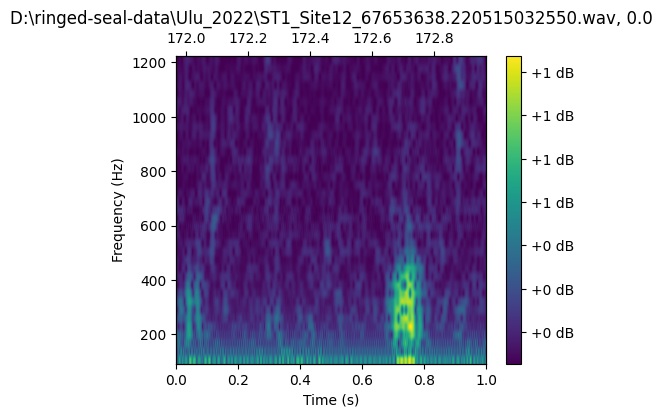

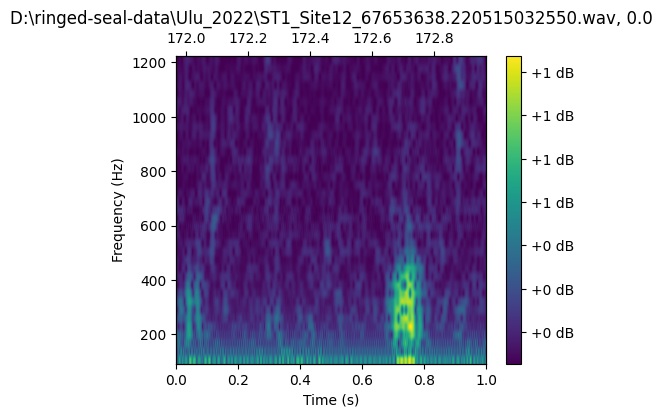

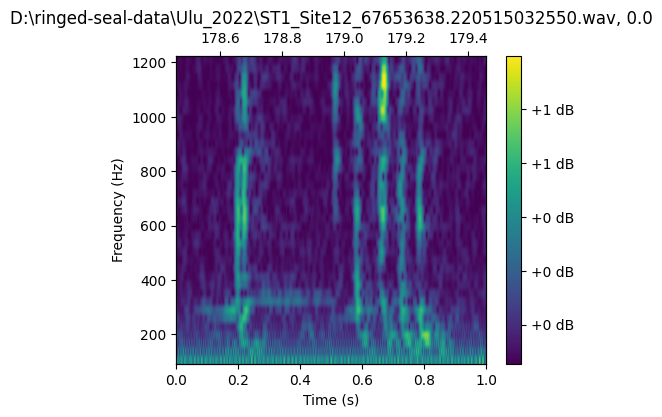

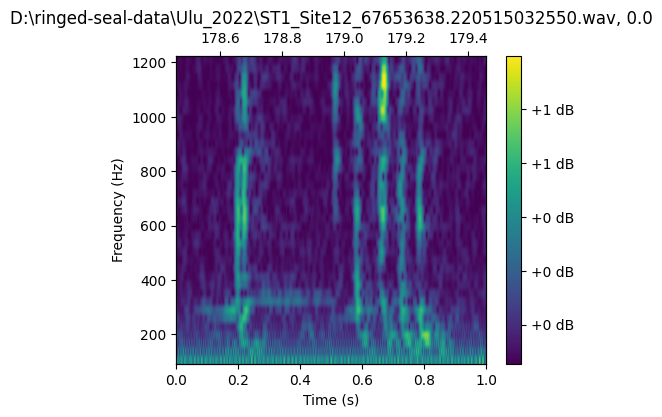

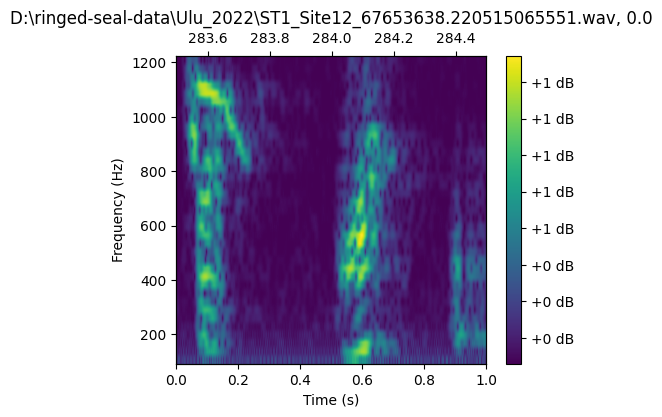

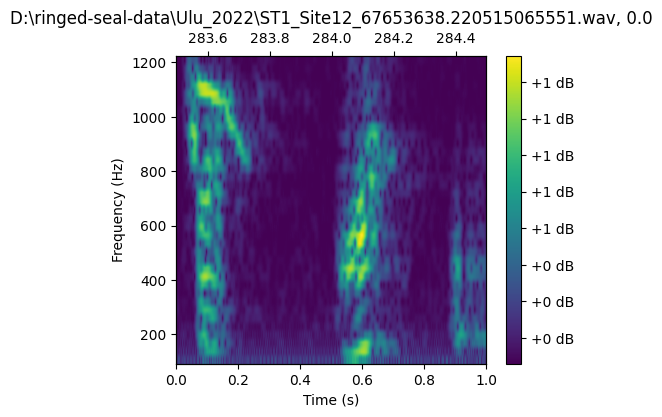

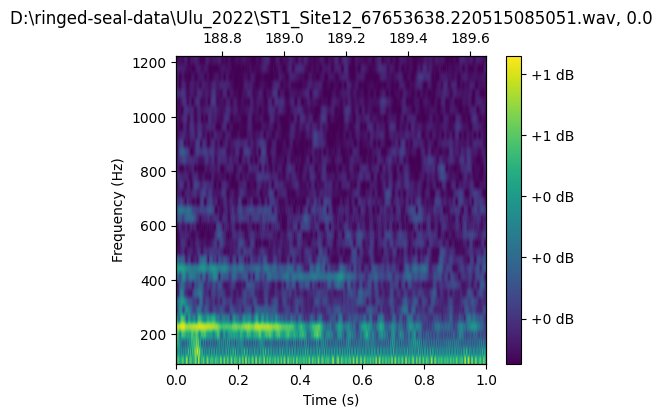

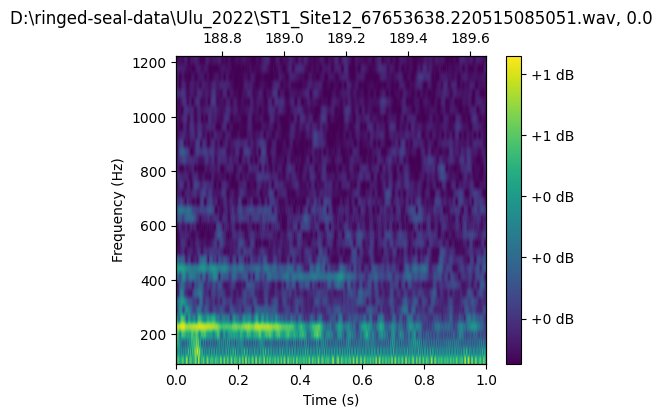

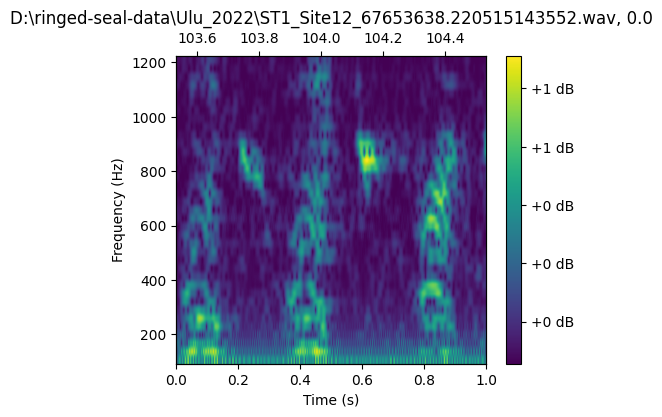

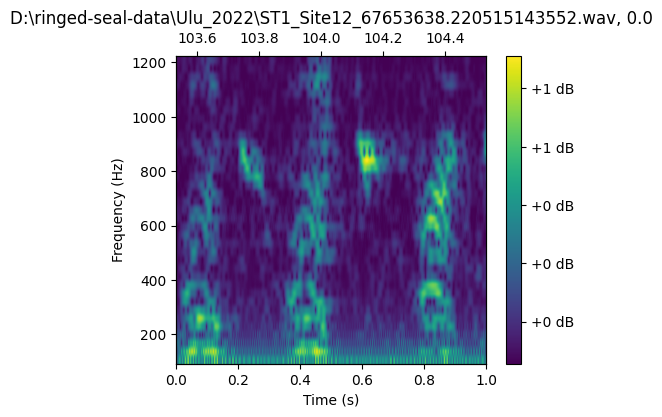

In [8]:
### Plot Spectrograms ###
annot_file = r'E:\final-baseline-detector\annots\pos\ULU2022_all_formatted_1sec.csv'
data_dir = r"D:\ringed-seal-data"
output_dir = r'E:\add_noise\spectrograms'
spec_file = r'E:\baseline-w-normalization\spec_config_100-1200Hz-0.032-hamm-normalized-enhanced.json'

# create an audioloader with the spectrograms
# note you need to define step, maximum overlap, and length in this step
annot, loader = load_audio_seg(annot_file, spec_file, data_dir)

# take audio segments and create spectrogram representation
plot_spectrogram(annot, loader, output_dir)